In [2]:
#Import the necessary methods from tweepy library
import tweepy
from tweepy import OAuthHandler


In [3]:
from tweepy import Stream
from tweepy.streaming import StreamListener

In [4]:
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# We import our access keys:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [6]:
# We create an extractor object:
api = twitter_setup()

#We create a tweet list as follows:
tweets = api.user_timeline(screen_name= "deepikapadukone", count=200)

#Perform a basic search query where we search for the #Padmavat
'%23Padmavat' in tweets
result = api.search(q='%23Padmavat')

#Print the number of items returned by the search query to verify our query ran. Its 15 by default
for tweet in result[:5]:
    print(tweet.text)
len(result)

RT @sri50: #Padmavat is a blockbuster. At the last count, the collection stands at Rs 212.50 Cr + Phenomenal for a film which had a truncat…
RT @RickySinghBedi1: Congratulations #ShahidKapoor for an inspiring performance in #Padmavat https://t.co/6KAhbu7Gfj
RT @hvgoenka: Ranvir Singh performing Gangnam Style. #Padmavat 
https://t.co/upFnxi0vW3
Sati was abolished by  insurance(lic) lobbyist #padmavat
Honestly m not even keen on watching #Padmavat but feeling disappointed in #guajarat. @CMOGuj shd be able to promot… https://t.co/xZqBUKkUeS


15

In [9]:
for tweet in result[ :10]:
    print(tweet.text)


RT @sri50: #Padmavat is a blockbuster. At the last count, the collection stands at Rs 212.50 Cr + Phenomenal for a film which had a truncat…
RT @RickySinghBedi1: Congratulations #ShahidKapoor for an inspiring performance in #Padmavat https://t.co/6KAhbu7Gfj
RT @hvgoenka: Ranvir Singh performing Gangnam Style. #Padmavat 
https://t.co/upFnxi0vW3
Sati was abolished by  insurance(lic) lobbyist #padmavat
Honestly m not even keen on watching #Padmavat but feeling disappointed in #guajarat. @CMOGuj shd be able to promot… https://t.co/xZqBUKkUeS
While #People spent past two months on controversies of #Padmavat, I discovered 17 new traits of my personality
I felt sad for deepveer shippers for not having a single scene of them together #Padmavat
RT @gupta_avishi: Haider.. Udta Punjab and now #Padmavat! 
@shahidkapoor has out-done himself in the recent past and how! 🙇🏻‍♀️😍
#Padmavat is truly a masterpiece without any doubt! Sanjay Leela Bhansali is a magician
RT @ankujsharma: Finally #Padmavat do

In [12]:
#Search tweet using #Padmavat

for tweet in tweepy.Cursor(api.search,
                           q='%23Padmavat',
                           rpp=1000,
                           result_type="recent",
                           since="2017-02-08",
                           until="2018-02-10",
                           include_entities=True,
                           lang="en").items(1000):
    result.append(tweet)
    
# Verify the number of items returned

print len(result)

for tweet in result[ :10]:
    print(tweet.text)

2015
RT @sri50: #Padmavat is a blockbuster. At the last count, the collection stands at Rs 212.50 Cr + Phenomenal for a film which had a truncat…
RT @RickySinghBedi1: Congratulations #ShahidKapoor for an inspiring performance in #Padmavat https://t.co/6KAhbu7Gfj
RT @hvgoenka: Ranvir Singh performing Gangnam Style. #Padmavat 
https://t.co/upFnxi0vW3
Sati was abolished by  insurance(lic) lobbyist #padmavat
Honestly m not even keen on watching #Padmavat but feeling disappointed in #guajarat. @CMOGuj shd be able to promot… https://t.co/xZqBUKkUeS
While #People spent past two months on controversies of #Padmavat, I discovered 17 new traits of my personality
I felt sad for deepveer shippers for not having a single scene of them together #Padmavat
RT @gupta_avishi: Haider.. Udta Punjab and now #Padmavat! 
@shahidkapoor has out-done himself in the recent past and how! 🙇🏻‍♀️😍
#Padmavat is truly a masterpiece without any doubt! Sanjay Leela Bhansali is a magician
RT @ankujsharma: Finally #Padmav

In [13]:
print(len(result))

2015


In [14]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in result], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

# We display the last 10 elements of the dataframe:
display(data.tail(10))

,Tweets
0,RT @sri50: #Padmavat is a blockbuster. At the ...
1,RT @RickySinghBedi1: Congratulations #ShahidKa...
2,RT @hvgoenka: Ranvir Singh performing Gangnam ...
3,Sati was abolished by insurance(lic) lobbyist...
4,Honestly m not even keen on watching #Padmavat...
5,While #People spent past two months on controv...
6,I felt sad for deepveer shippers for not havin...
7,RT @gupta_avishi: Haider.. Udta Punjab and now...
8,#Padmavat is truly a masterpiece without any d...
9,RT @ankujsharma: Finally #Padmavat done today!...


,Tweets
2005,The ppl who did protest to movie #Padmavat do ...
2006,Finally watched #Padmavat 🙌
2007,"#Padmavat ,one of the Finest movies in Indian ..."
2008,RT @SudakshinaKina: Saw #Padmavat and thought ...
2009,RT @advmonikaarora: Saw #Padmavat\nPadmavati h...
2010,RT @advmonikaarora: Saw #Padmavat\nPadmavati h...
2011,RT @advmonikaarora: Saw #Padmavat\nPadmavati h...
2012,RT @advmonikaarora: Saw #Padmavat\nPadmavati h...
2013,RT @advmonikaarora: Saw #Padmavat\nPadmavati h...
2014,RT @NeenuPeenu: The only thing I felt was miss...


In [15]:
# Internal methods of a single tweet object:
print(dir(result[0]))

['__class__', '__delattr__', '__dict__', '__doc__', '__eq__', '__format__', '__getattribute__', '__getstate__', '__hash__', '__init__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweeted_status', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [16]:
# We print info from the first tweet:
print(result[0].id)
print(result[0].created_at)
print(result[0].source)
print(result[0].favorite_count)
print(result[0].retweet_count)
print(result[0].geo)
print(result[0].coordinates)
print(result[0].entities)

960629300843237376
2018-02-05 21:40:47
Twitter for Android
0
81
None
None
{u'symbols': [], u'user_mentions': [{u'id': 44900754, u'indices': [3, 9], u'id_str': u'44900754', u'screen_name': u'sri50', u'name': u'Sreedhar Pillai'}], u'hashtags': [{u'indices': [11, 20], u'text': u'Padmavat'}], u'urls': []}


In [17]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in result ])
data['ID']   = np.array([tweet.id for tweet in result])
data['Date'] = np.array([tweet.created_at for tweet in result])
data['Source'] = np.array([tweet.source for tweet in result])
data['Likes']  = np.array([tweet.favorite_count for tweet in result])
data['RTs']    = np.array([tweet.retweet_count for tweet in result])
data['User'] = np.array([tweet.user.screen_name for tweet in result])

In [18]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])
print(fav_max) 

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is:",format(data['Tweets'][fav]))
print("Number of likes: ",format(fav_max))
print("number of characters.",format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: ",format(data['Tweets'][rt]))
print("Number of retweets:",format(rt_max))
print("number of characters.",format(data['len'][rt]))

1225
('The tweet with more likes is:', u'I never thought I would fall in love with such a Khatarnaak Villain!! @RanveerOfficial \u2764\ufe0f you were phenomenal in\u2026 https://t.co/kSrpudZ8EE')
('Number of likes: ', '1225')
('number of characters.', '137')
('The tweet with more retweets is: ', u'RT @gokulchan: Epic of #Padmavat protest in TN.\nBJP holds protest in front of theatre playing Bagmathi thinking thats Padmavat.')
('Number of retweets:', '1248')
('number of characters.', '127')


In [19]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

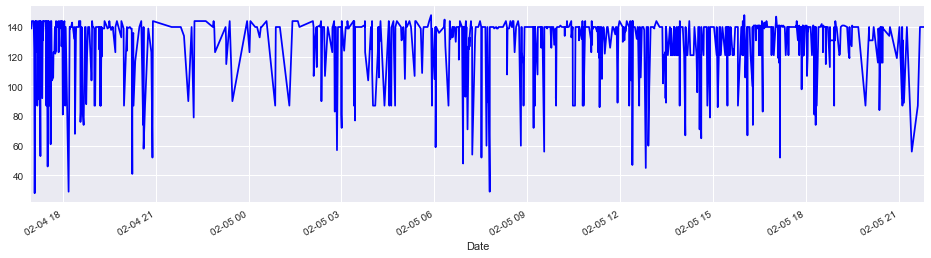

In [20]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='b');

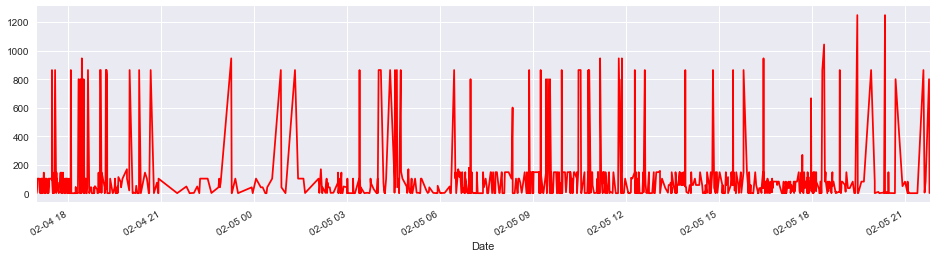

In [21]:
# Time series for retweet:
tret.plot(figsize=(16,4), color='r');

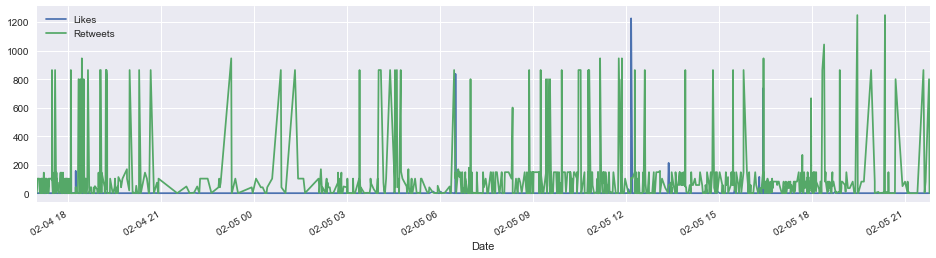

In [22]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [53]:
import csv
from textblob import TextBlob

In [54]:
# The main package to help us with our text analysis
from textblob import TextBlob

# For reading input files in CSV format
import csv

# For doing cool regular expressions
import re

# For sorting dictionaries
import operator


# For plotting results
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# Intialize an empty list to hold all of our tweets
tweets = []


# A helper function that removes all the non ASCII characters
# from the given string. Retuns a string with only ASCII characters.
def strip_non_ascii(string):
    ''' Returns the string without non ASCII characters'''
    stripped = (c for c in string if 0 < ord(c) < 127)
    return ''.join(stripped)



TOP NEGATIVE TWEETS
polarity=-1.00, clean=i am hoping to see @ranveerofficial as the evil khilji tomorrow! #dussehra #padmavati
polarity=-1.00, clean=#bollywood #news #2017 #anushka #sharma #shocking #reply #on #deepika http:// ow.ly/xfap30ft6x6 #padukone #padmavati #look #vogue #women #of #
polarity=-1.00, clean=and she lied! @anushkasharma 's shocking reply when asked about @deepikapadukone 's #padmavati look  filmibeat.com/bollywood/news /2017/anushka-sharma-shocking-reply-on-deepika-padukone-padmavati-look-vogue-women-of-the-year-awards-268295.html?utm_source=article&utm_medium=tweet-button&utm_campaign=article-tweet  #anushkasharma
polarity=-1.00, clean=terrible edit but i had to post!!!! #shahidkapoor @shahidkapoor #maharawalratansingh #padmavati pic.twitter.com/8g7snwnxuo
polarity=-1.00, clean=shocking expose ! shows #karnisena keen for #money n #extortion ,not #padmavati honour n #rajputpride http:// indiatoday.intoday.in/video/padmavat i-karni-sena-sanjay-leela-bhansali/1/10

polarity=-0.04, clean=#padmavati looks like the extension of ramleela second half. deepika and ranveer needs to do some different movies than the same bs.
polarity=-0.04, clean=beyond every other things... #padmavati will be a visual treat .no one can create a film with such grandeur and aesthetics like slb
polarity=-0.04, clean=the first poster of @deepikapadukone as #padmavati is subtle beauty with grace. an exclusive  instagram.com/p/bzss3owg-n6/
polarity=-0.04, clean=the first poster of @deepikapadukone as #padmavati is subtle beauty with grace. an exclusive  instagram.com/p/bzss3owg-n6/
polarity=-0.04, clean=the first poster of @deepikapadukone as #padmavati is subtle beauty with grace. an exclusive  instagram.com/p/bzss3owg-n6/
polarity=-0.04, clean=it gives such a soothing feeling to see everyone talking abt #padmavati even by fanclubs who wants it to b a failure. #highlyanticipated
polarity=-0.04, clean=it gives such a soothing feeling to see everyone talking abt #padmavati eve

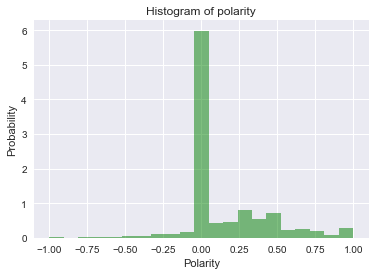

In [50]:
with open('Tweet.csv', 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    reader.next() 
    
    for row in reader:
        tweet= dict()
        #tweet['id'] = row[8]
        #tweet['date'] = int(row[1])
        tweet['orig'] = row[4]
        


        # Ignore retweets
        if re.match(r'^RT.*', tweet['orig']):
            continue

        tweet['clean'] = tweet['orig']

        # Remove all non-ascii characters
        tweet['clean'] = strip_non_ascii(tweet['clean'])

        # Normalize case
        tweet['clean'] = tweet['clean'].lower()

        # Remove URLS. (I stole this regex from the internet.)
        tweet['clean'] = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', tweet['clean'])

        # Fix classic tweet lingo
        tweet['clean'] = re.sub(r'\bthats\b', 'that is', tweet['clean'])
        tweet['clean'] = re.sub(r'\bive\b', 'i have', tweet['clean'])
        tweet['clean'] = re.sub(r'\bim\b', 'i am', tweet['clean'])
        tweet['clean'] = re.sub(r'\bya\b', 'yeah', tweet['clean'])
        tweet['clean'] = re.sub(r'\bcant\b', 'can not', tweet['clean'])
        tweet['clean'] = re.sub(r'\bwont\b', 'will not', tweet['clean'])
        tweet['clean'] = re.sub(r'\bid\b', 'i would', tweet['clean'])
        tweet['clean'] = re.sub(r'wtf', 'what the fuck', tweet['clean'])
        tweet['clean'] = re.sub(r'\bwth\b', 'what the hell', tweet['clean'])
        tweet['clean'] = re.sub(r'\br\b', 'are', tweet['clean'])
        tweet['clean'] = re.sub(r'\bu\b', 'you', tweet['clean'])
        tweet['clean'] = re.sub(r'\bk\b', 'OK', tweet['clean'])
        tweet['clean'] = re.sub(r'\bsux\b', 'sucks', tweet['clean'])
        tweet['clean'] = re.sub(r'\bno+\b', 'no', tweet['clean'])
        tweet['clean'] = re.sub(r'\bcoo+\b', 'cool', tweet['clean'])
        
        
        # Create textblob object
        tweet['TextBlob'] = TextBlob(tweet['clean'])

        # Correct spelling (WARNING: SLOW)
        #tweet['TextBlob'] = tweet['TextBlob'].correct()

        tweets.append(tweet)
    
    # DEVELOP MODELS

    for tweet in tweets:
        tweet['polarity'] = float(tweet['TextBlob'].sentiment.polarity)
        tweet['subjectivity'] = float(tweet['TextBlob'].sentiment.subjectivity)

        if tweet['polarity'] >= 0.1:
            tweet['sentiment'] = 'positive'
        elif tweet['polarity'] <= -0.1:
            tweet['sentiment'] = 'negative'
        else:
            tweet['sentiment'] = 'neutral'

    tweets_sorted = sorted(tweets, key=lambda k: k['polarity'])


    # EVALUATE RESULTS

    # First, print out a few example tweets from each sentiment category.

    print "\n\nTOP NEGATIVE TWEETS"
    negative_tweets = [d for d in tweets_sorted if d['sentiment'] == 'negative']
    for tweet in negative_tweets[0:100]:
        print "polarity=%.2f, clean=%s" % (tweet['polarity'], tweet['clean'])

    print "\n\nTOP POSITIVE TWEETS"
    positive_tweets = [d for d in tweets_sorted if d['sentiment'] == 'positive']
    for tweet in positive_tweets[-100:]:
        print "polarity=%.2f, clean=%s" % (tweet['polarity'], tweet['clean'])

    print "\n\nTOP NEUTRAL TWEETS"
    neutral_tweets = [d for d in tweets_sorted if d['sentiment'] == 'neutral']
    for tweet in neutral_tweets[0:500]:
        print "polarity=%.2f, clean=%s" % (tweet['polarity'], tweet['clean'])
    
    # Next, create some plots

    



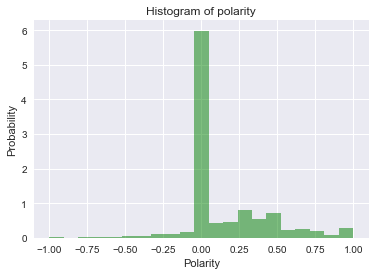

In [55]:
# A histogram of the scores.
x = [d['polarity'] for d in tweets_sorted]
num_bins = 21
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='green', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Probability')
plt.title(r'Histogram of polarity')

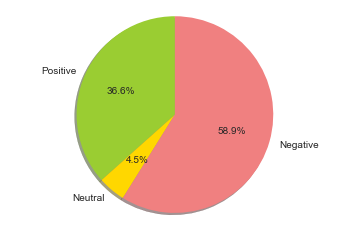

In [56]:
# A pie chart showing the number of tweets in each sentiment category

pos = len(positive_tweets)
neu = len(negative_tweets)
neg = len(neutral_tweets)
labels = 'Positive', 'Neutral', 'Negative'
sizes = [pos, neu, neg]
colors = ['yellowgreen', 'gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()